In [1]:
!pip install fasteda

  Preparing metadata (setup.py) ... - done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4740 sha256=ef98f2dee7adf73e88f9d0cea833e11a28055d05e01b2cf6a6e54975eb88d961
  Stored in directory: /root/.cache/pip/wheels/4f/13/ff/0dd443dbccb4aeb12e299f90c9f47d758d893fd26c22537443
Successfully built fasteda


In [2]:
!pip install opentsne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.3 MB/s eta 0:00:00


In [3]:
from fasteda import fast_eda
from openTSNE import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")
original = pd.read_csv("/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")

y_tsne = train["target"].values
train_tsne = train[test.drop(columns = "id").columns].values
test_tsne = test[test.drop(columns = "id").columns].values

In [5]:
original.shape # The original data only has 79 rows!

(79, 7)

In [6]:
for col in train.columns:
    print(col, train[col].nunique())

id 414
gravity 28
ph 71
osmo 80
cond 65
urea 73
calc 85
target 2


### Similar rows between the train and test set

In [7]:
train.query("id in [235, 293]")

id  gravity    ph  osmo  cond  urea  calc  target
235  235    1.021  5.53   815  27.6   385  2.66       1
293  293    1.021  5.44   774  29.0   325  6.96       1

In [8]:
test.query("id in [431, 549]")

id  gravity    ph  osmo  cond  urea  calc
17   431    1.021  5.33   815  27.6   385  2.66
135  549    1.021  5.66   774  29.0   325  6.96

### fasteda on the train set with target = "target"

DataFrame Head:


id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0

DataFrame Tail:


id  gravity    ph  osmo  cond  urea  calc  target
411  411    1.018  6.28   455  22.2   270  7.68       1
412  412    1.008  7.12   325  12.6    75  1.03       1
413  413    1.011  6.13   364   9.9   159  0.27       0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(414, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



----------------------------------------------------------------------------------------------------
DataFrame Correlation:



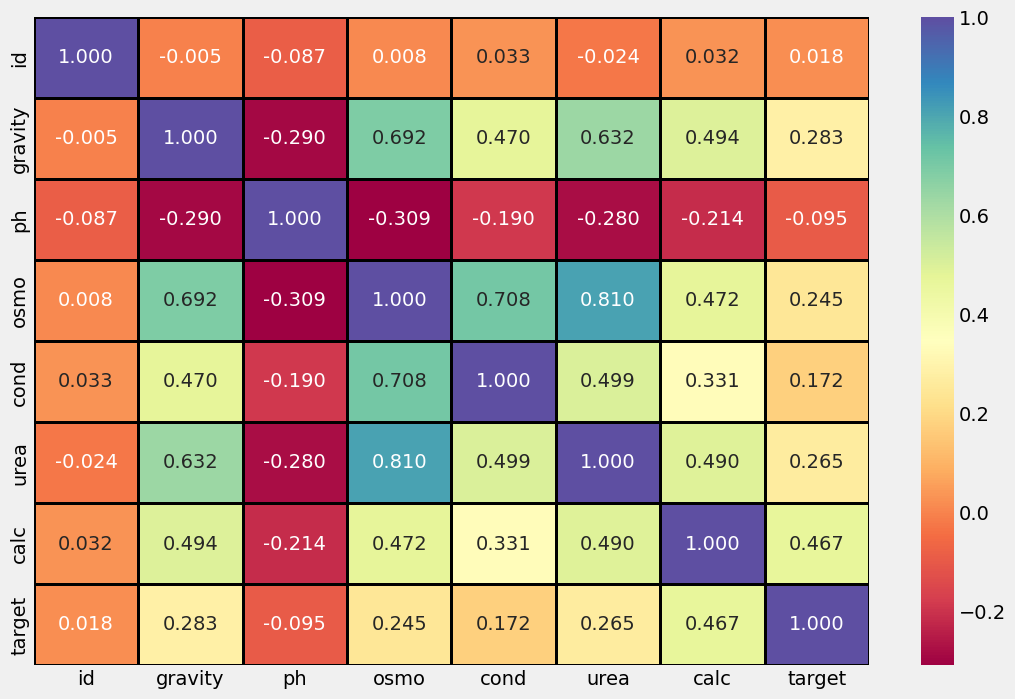

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



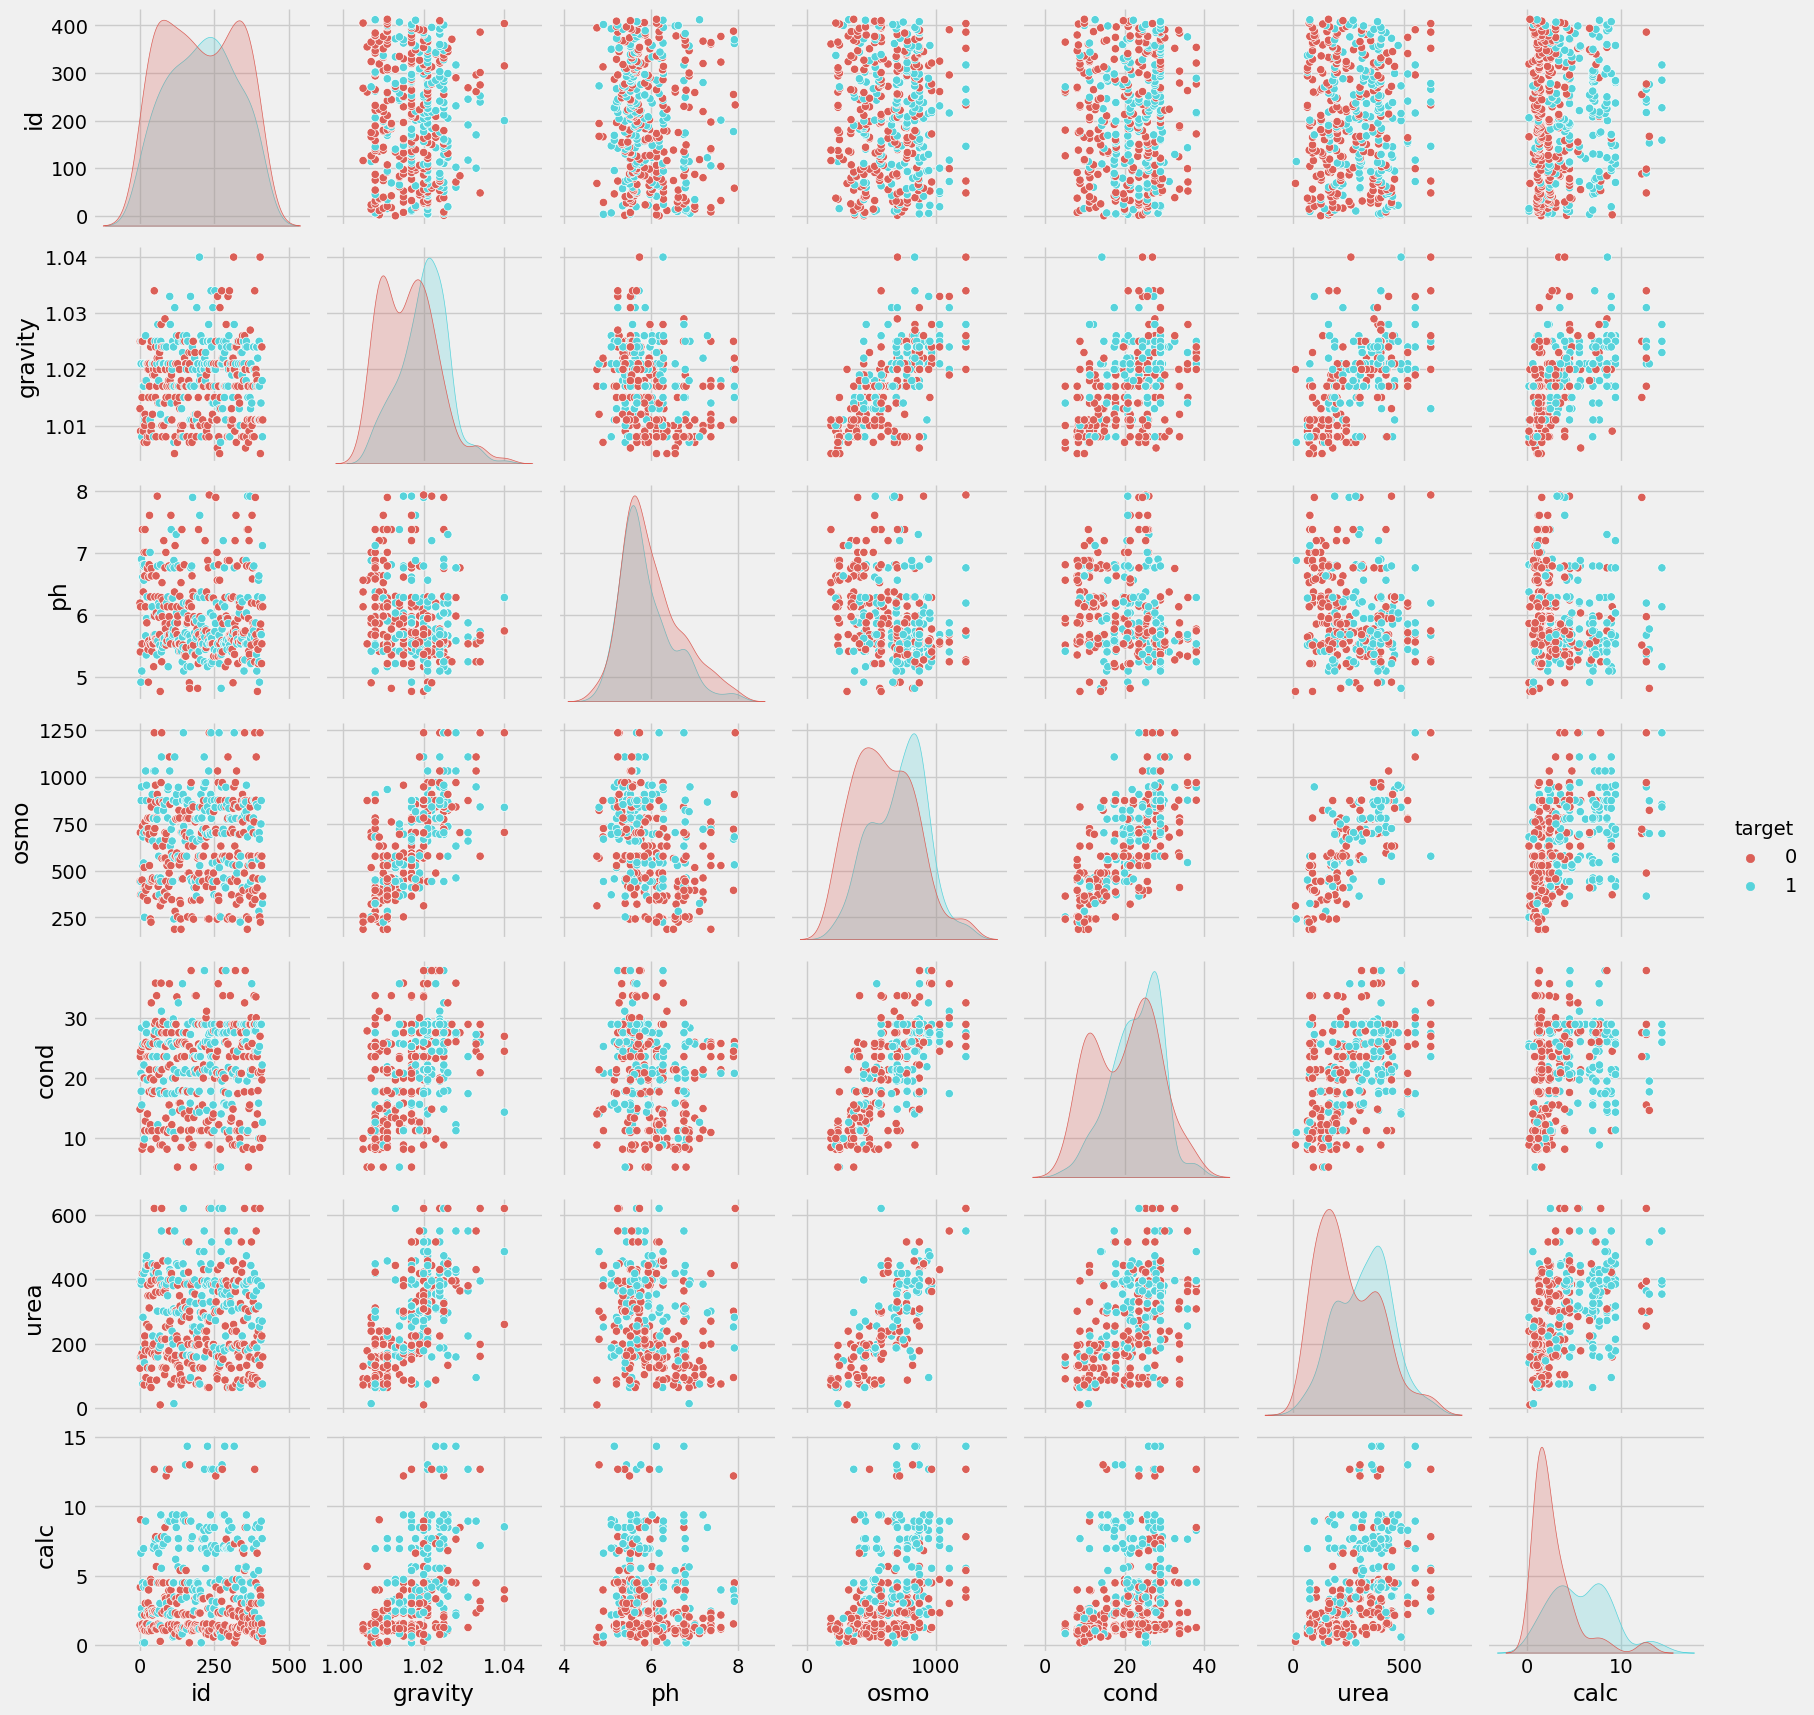

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



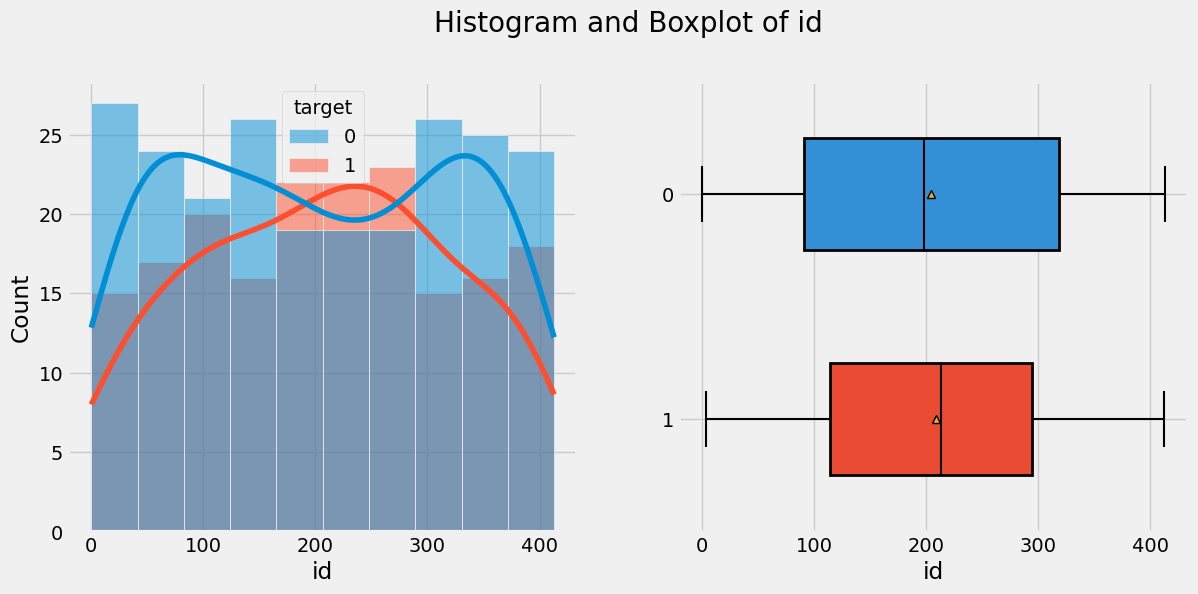

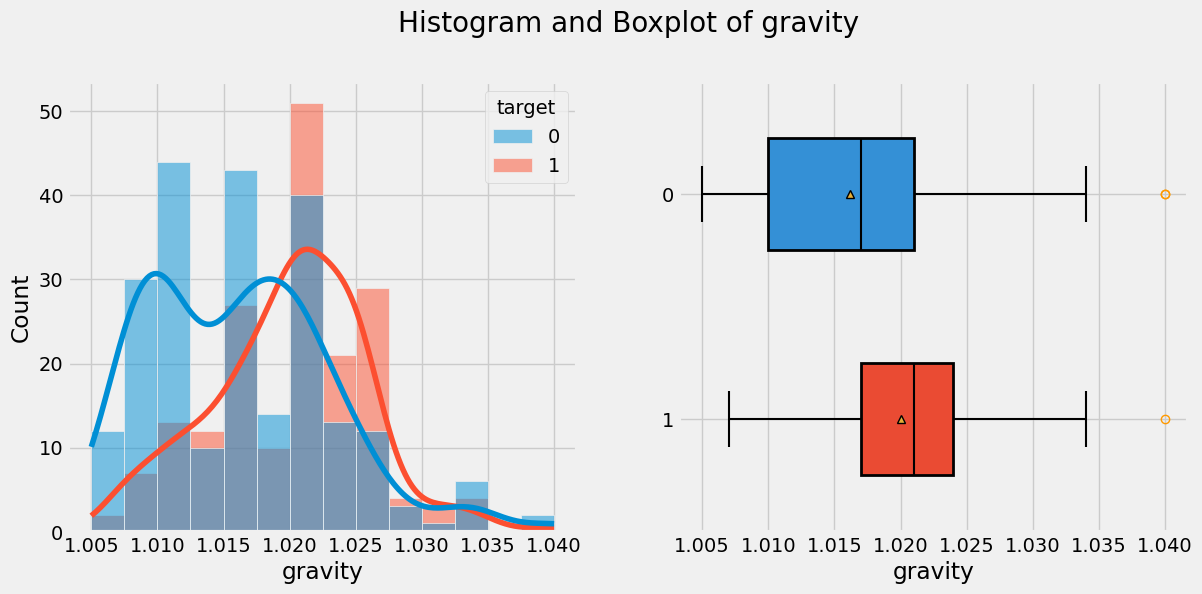

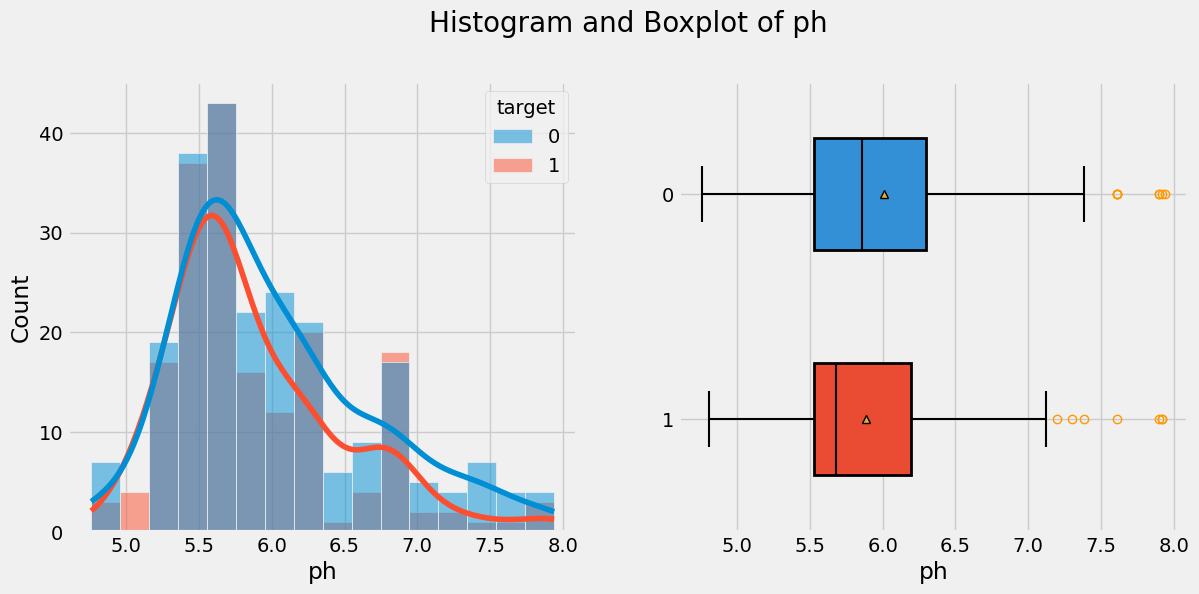

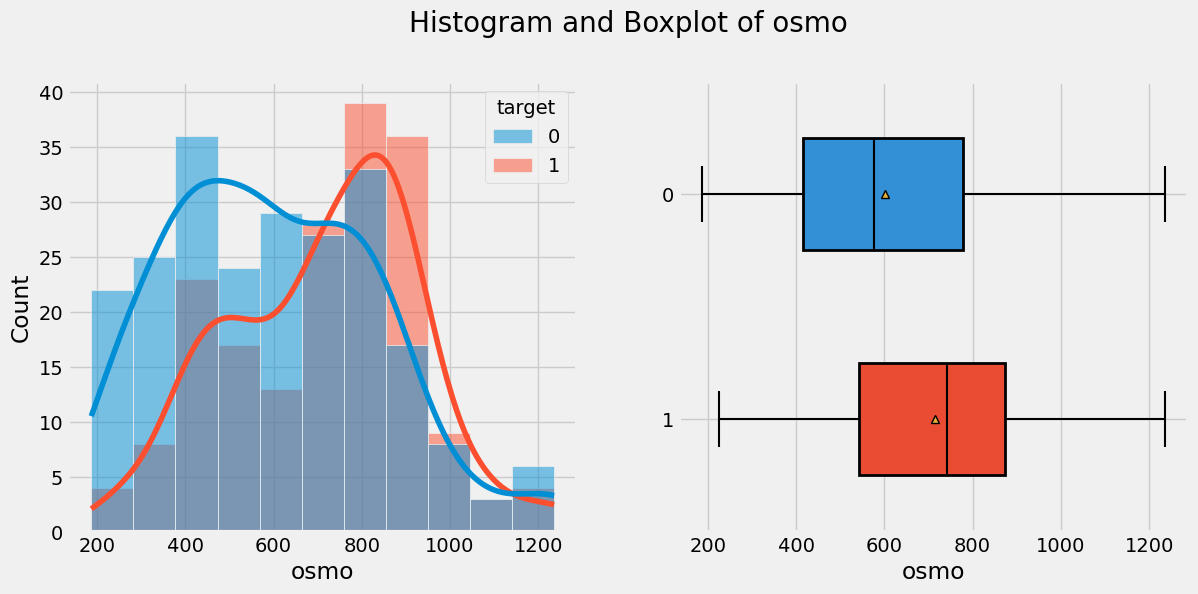

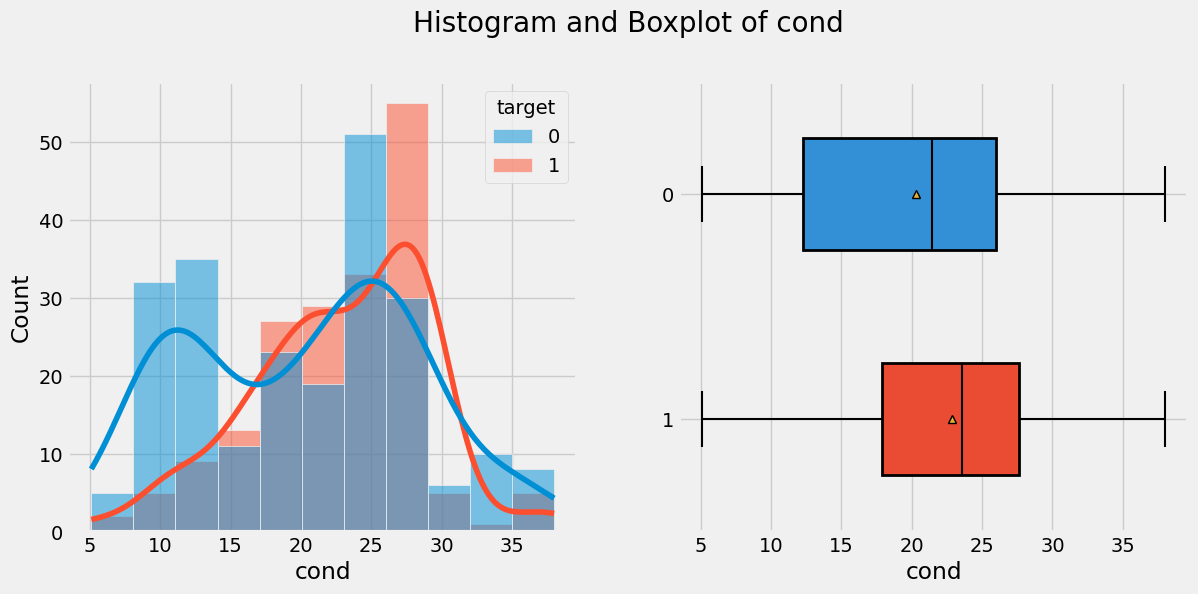

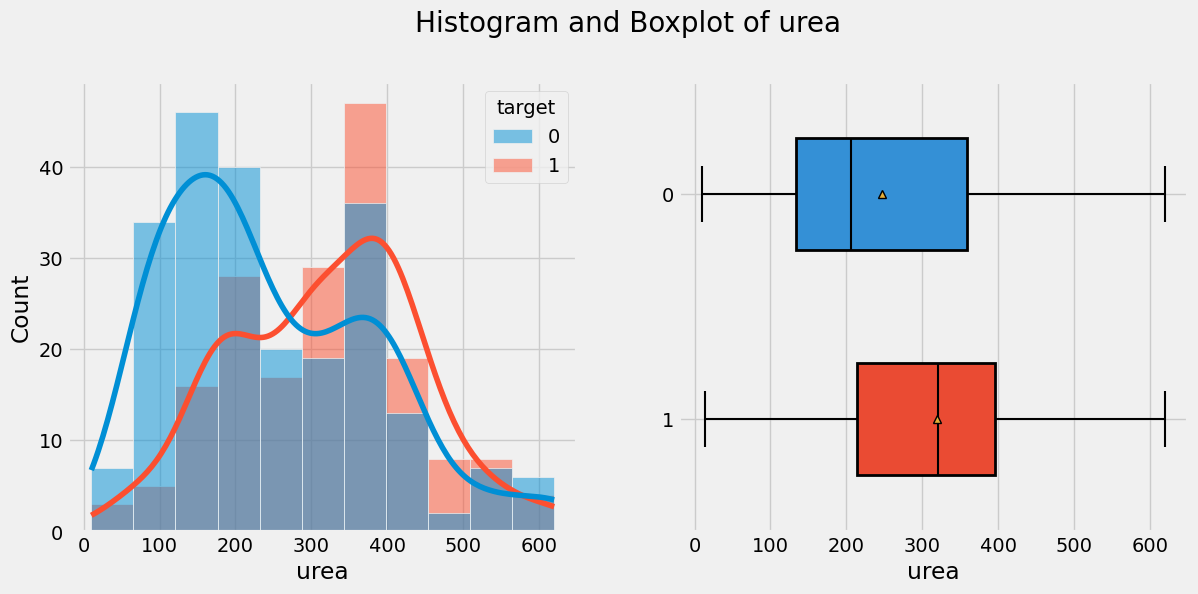

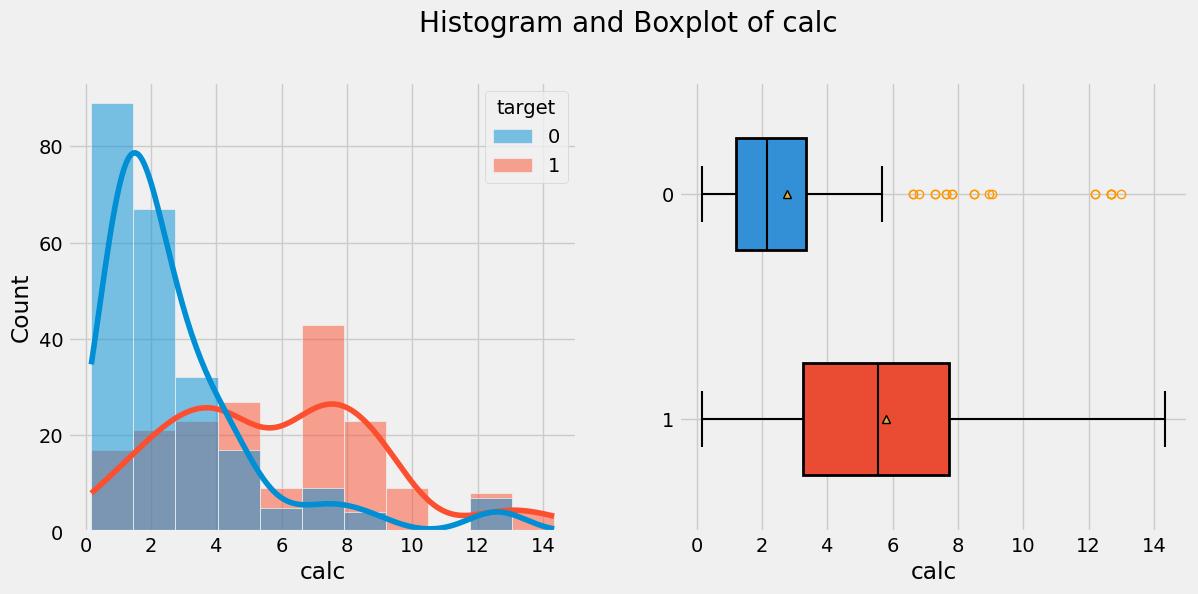

----------------------------------------------------------------------------------------------------
Countplot(s):



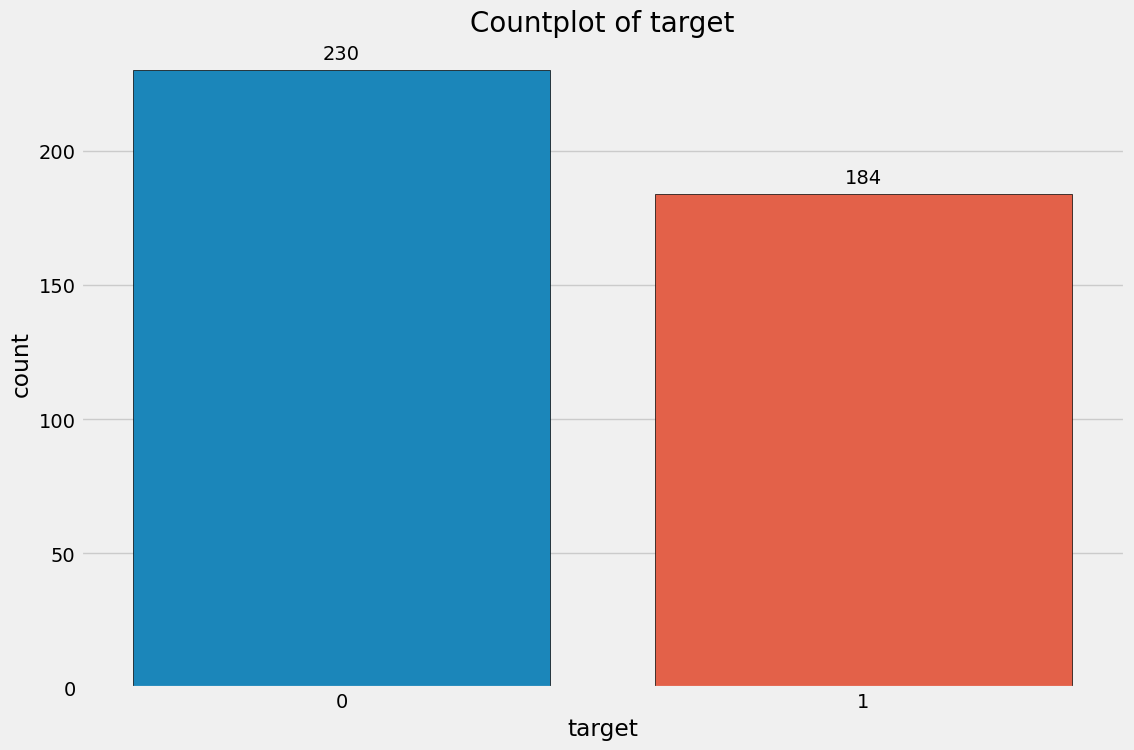

In [9]:
fast_eda(train, target = "target")

In [10]:
train["is_train"] = 1
test["is_train"] = 0

train_test = pd.concat([train, test], ignore_index = True)

### fasteda on the train & test set with target = "is_train"

DataFrame Head:


id  gravity    ph  osmo  cond  urea  calc  target  is_train
0   0    1.013  6.19   443  14.8   124  1.45     0.0         1
1   1    1.025  5.40   703  23.6   394  4.18     0.0         1
2   2    1.009  6.13   371  24.5   159  9.04     0.0         1

DataFrame Tail:


id  gravity    ph  osmo  cond  urea  calc  target  is_train
687  687    1.031  5.68   874  29.0   380  4.49     NaN         0
688  688    1.019  5.47   543  21.4   170  1.64     NaN         0
689  689    1.017  6.19   698  29.0   252  3.53     NaN         0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
MSNO Matrix:



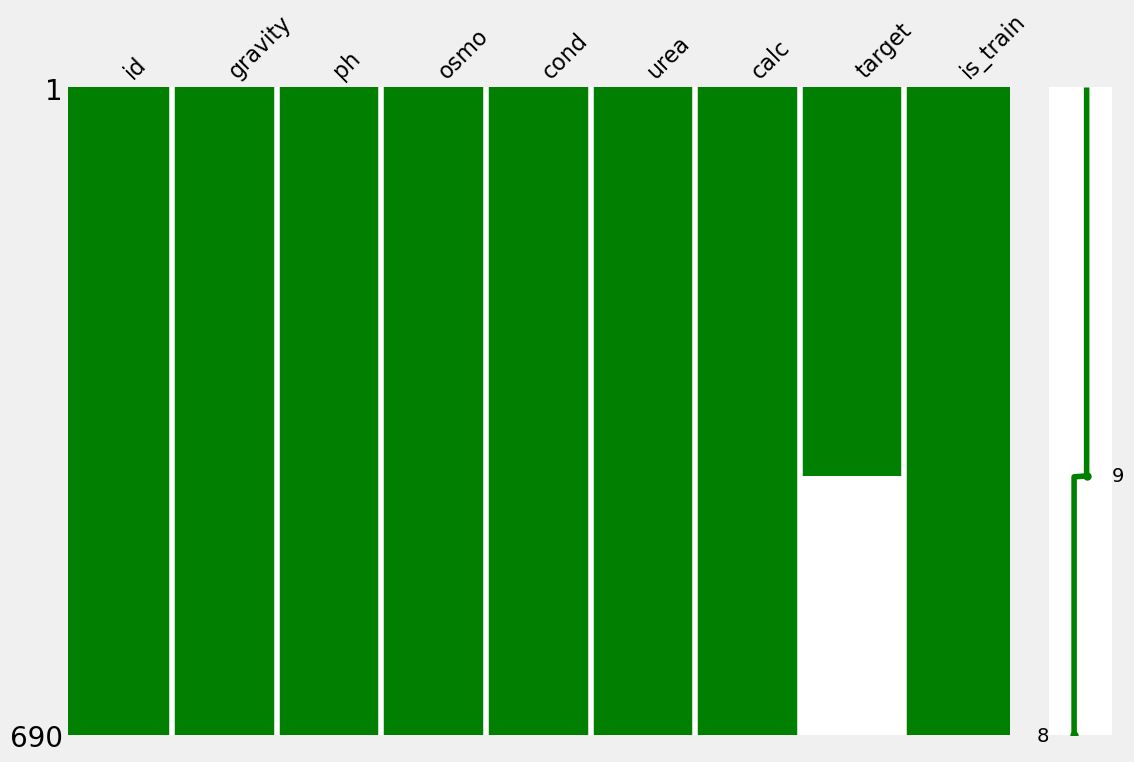

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(690, 9)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        690 non-null    int64  
 1   gravity   690 non-null    float64
 2   ph        690 non-null    float64
 3   osmo      690 non-null    int64  
 4   cond      690 non-null    float64
 5   urea      690 non-null    int64  
 6   calc      690 non-null    float64
 7   target    414 non-null    float64
 8   is_train  690 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 48.6 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



----------------------------------------------------------------------------------------------------
DataFrame Correlation:



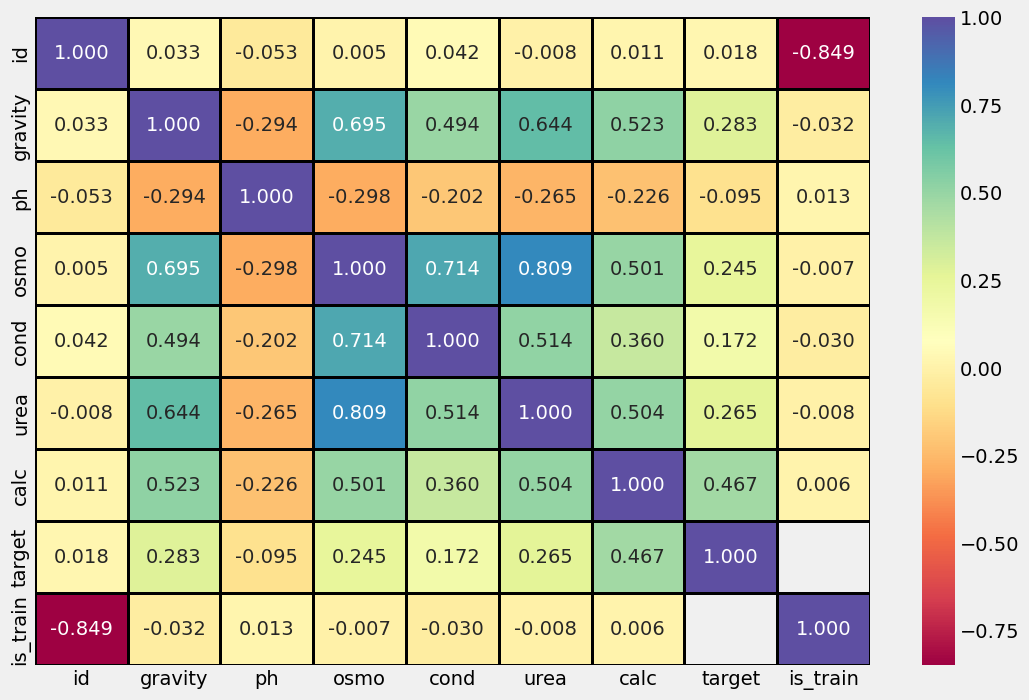

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



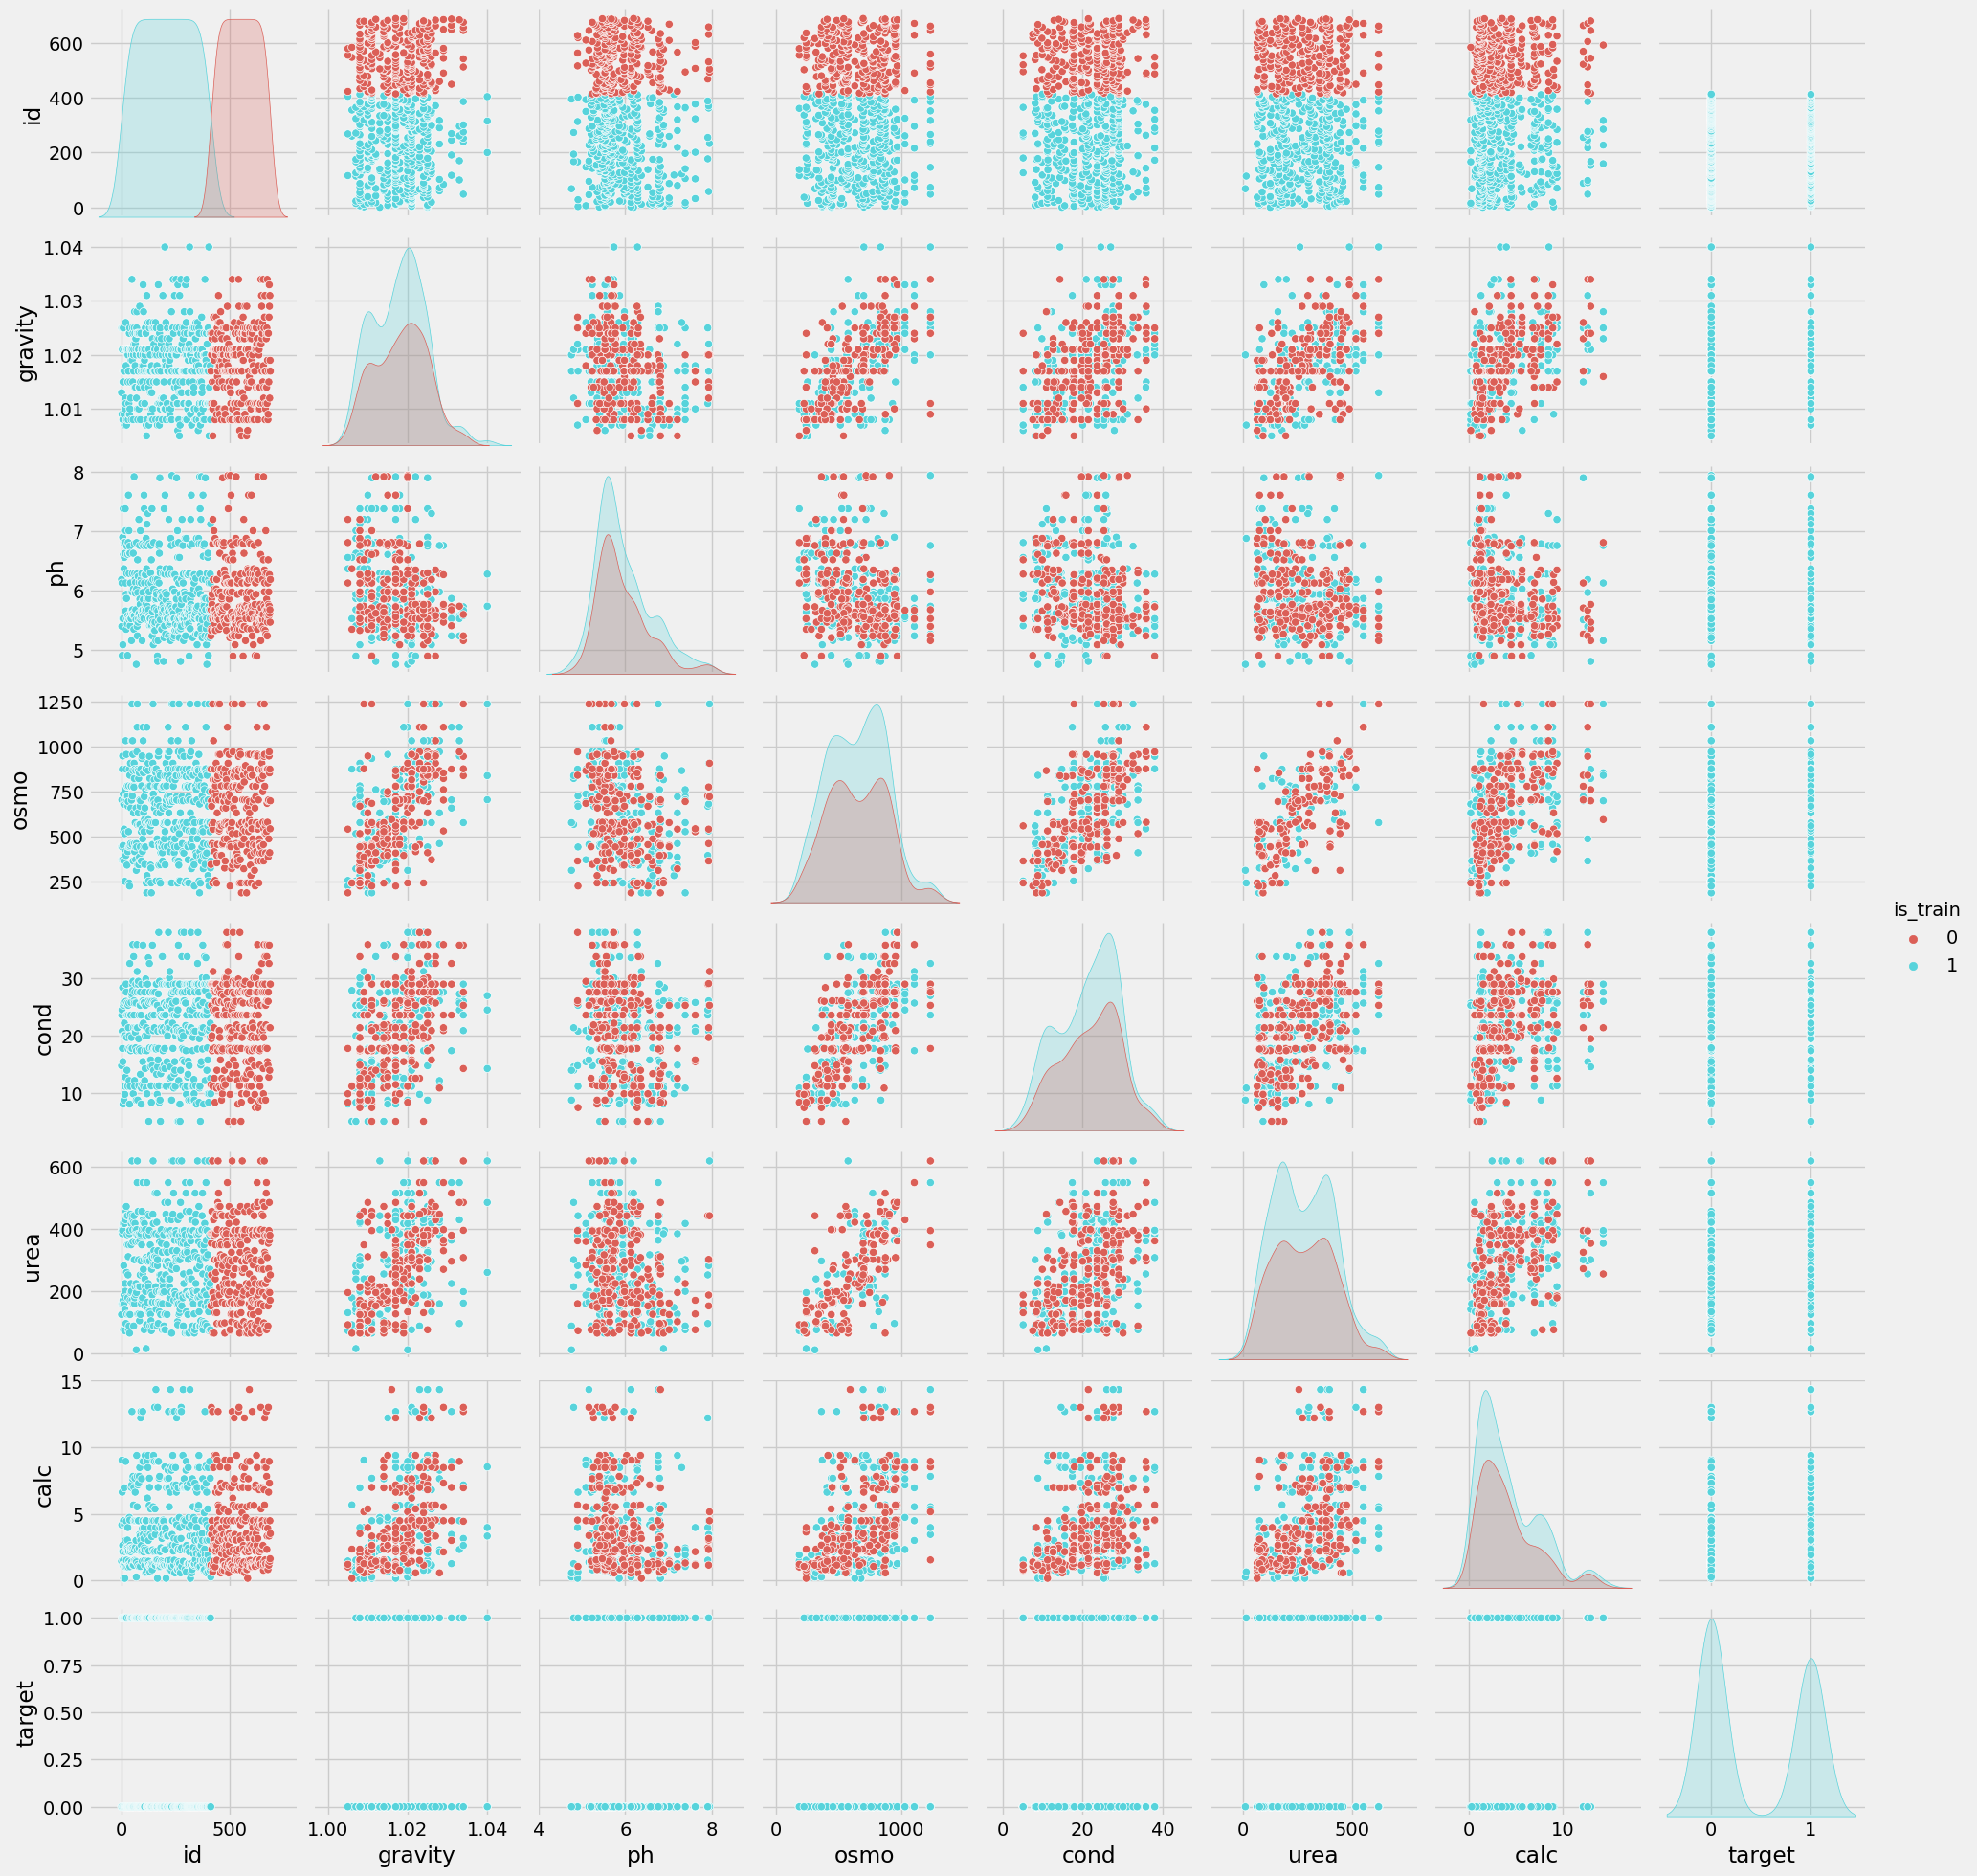

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



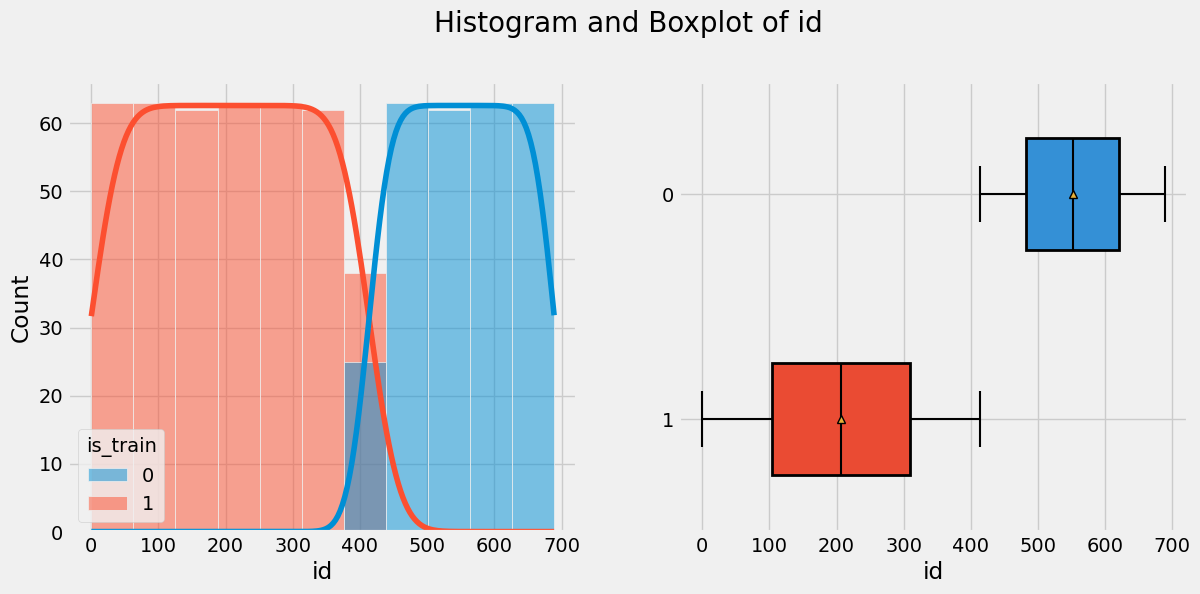

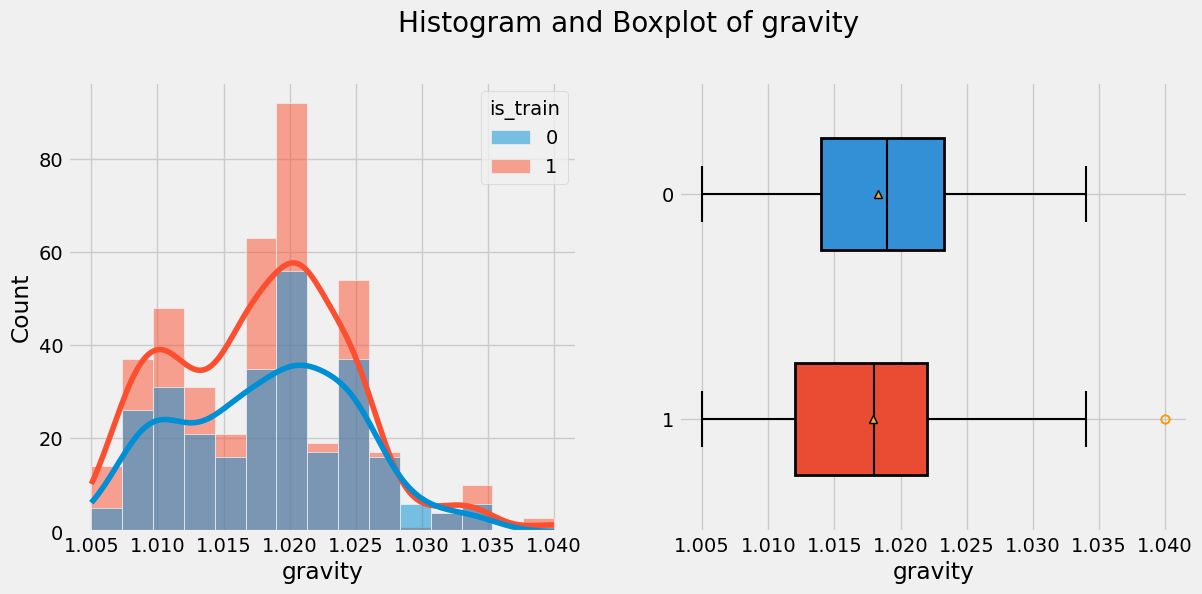

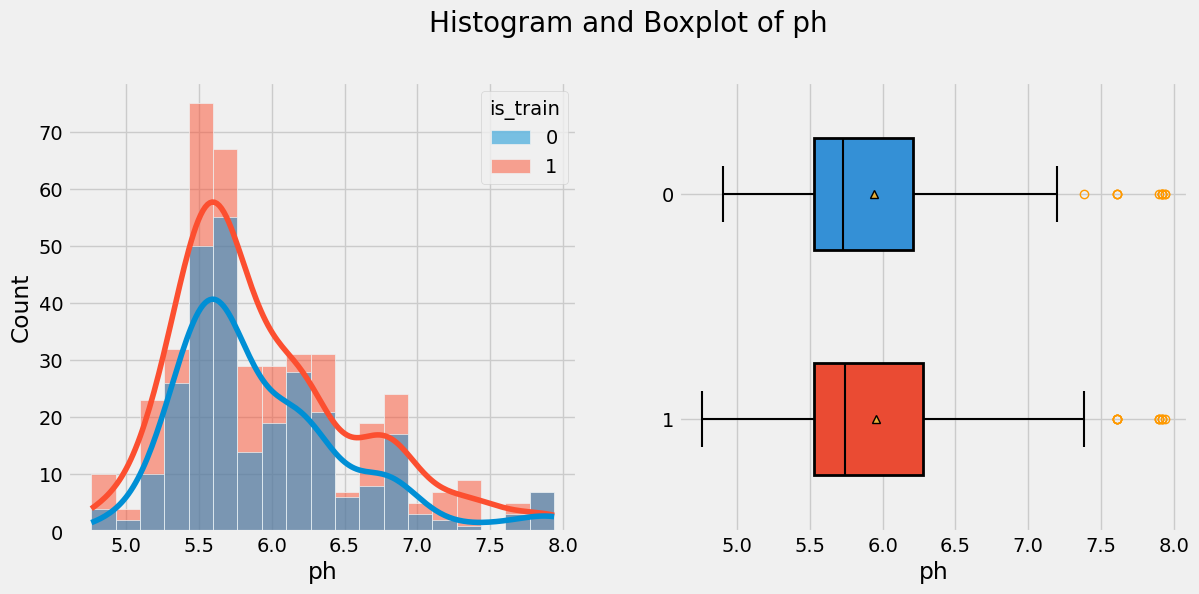

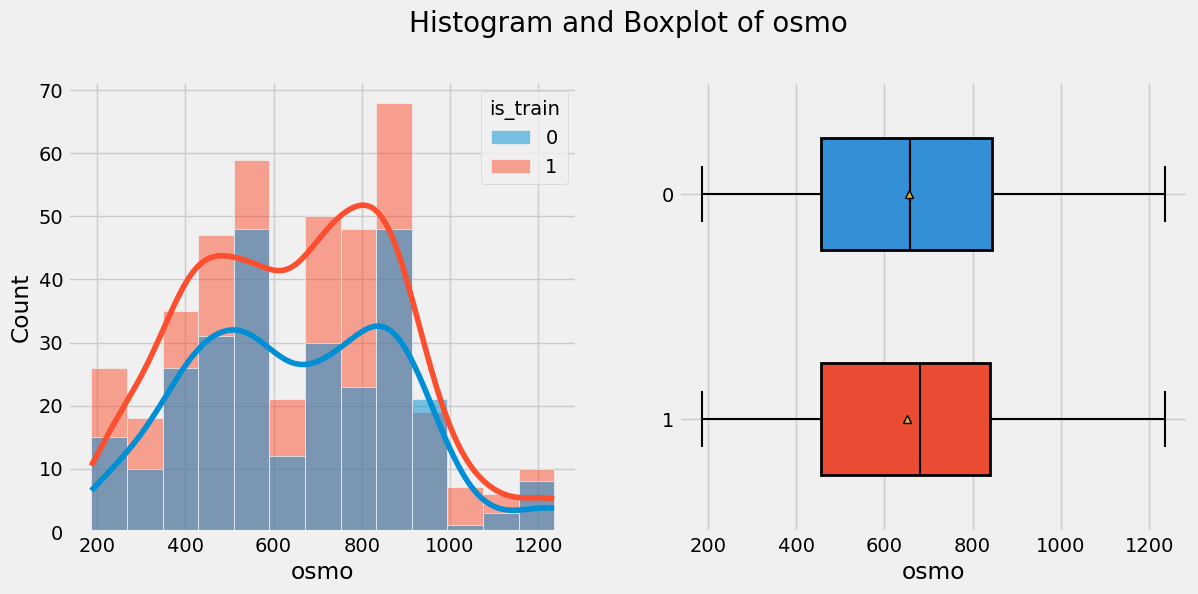

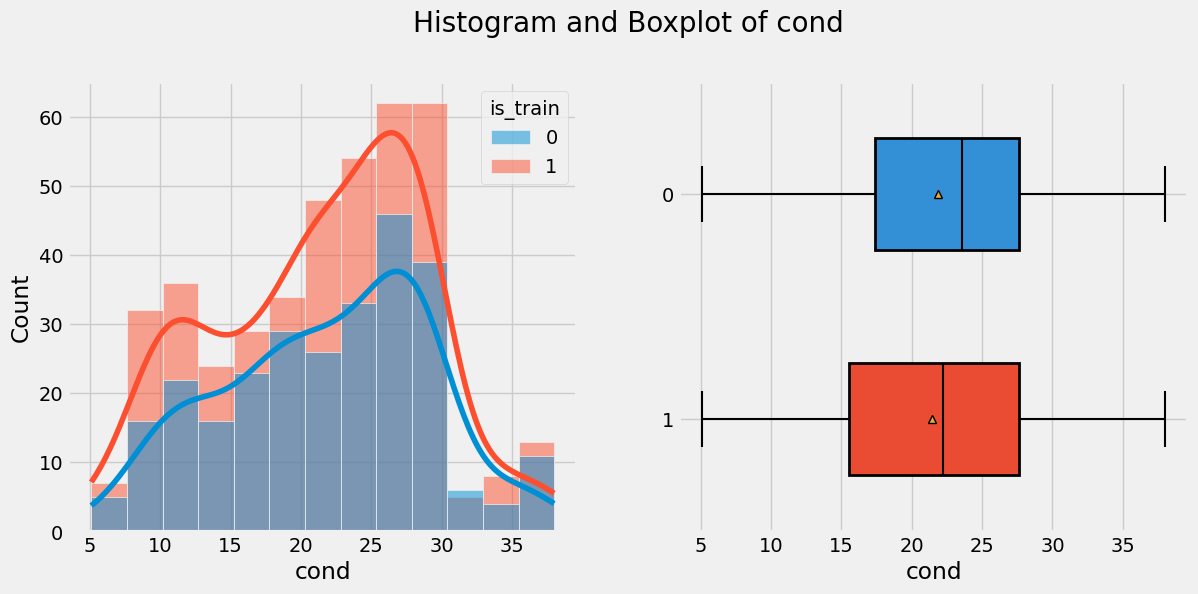

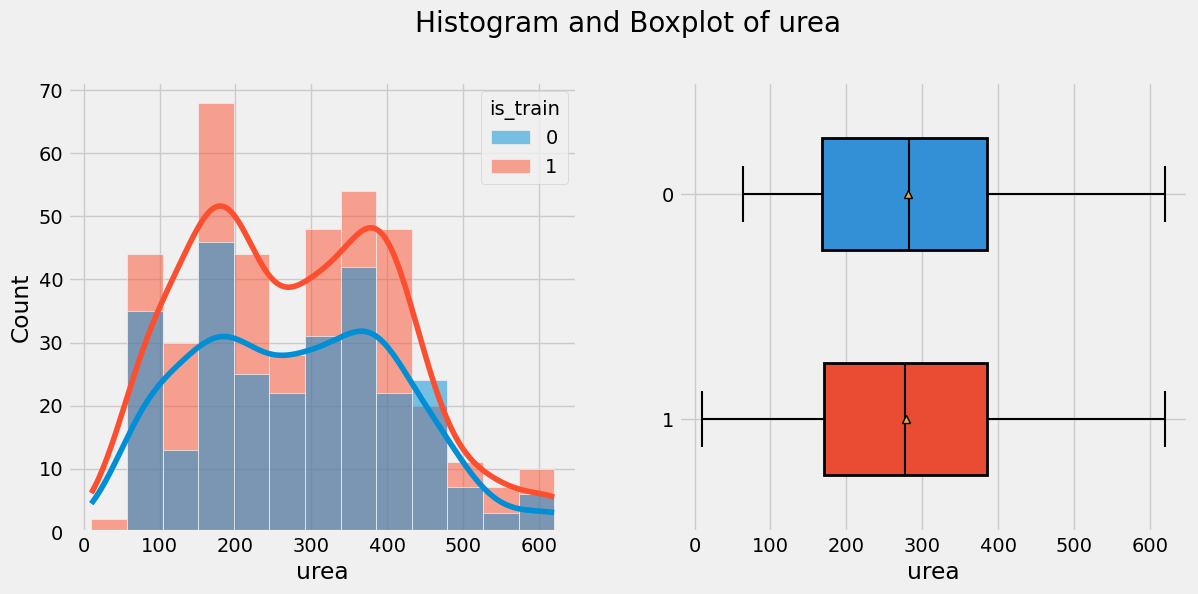

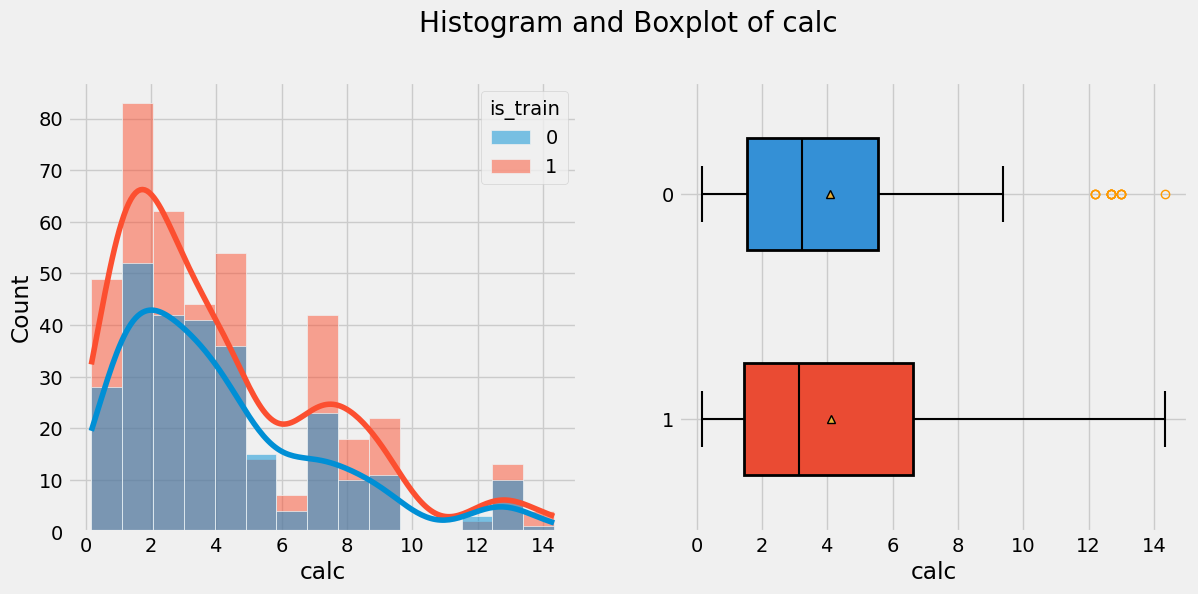

----------------------------------------------------------------------------------------------------
Countplot(s):



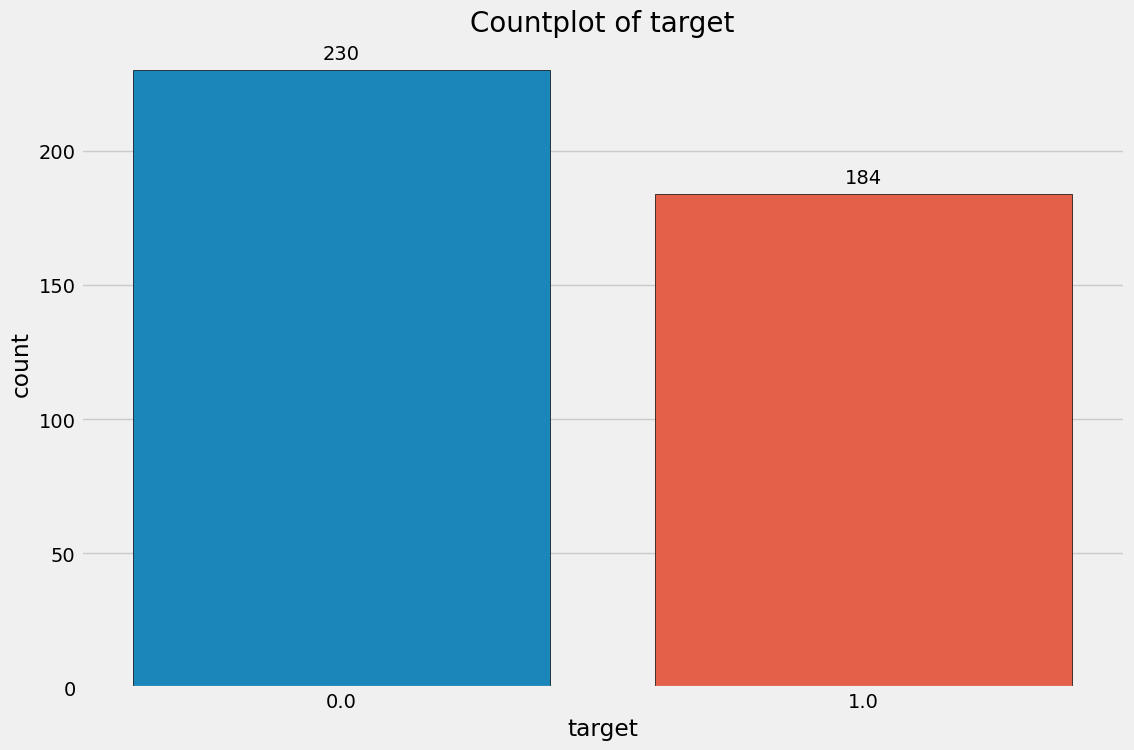

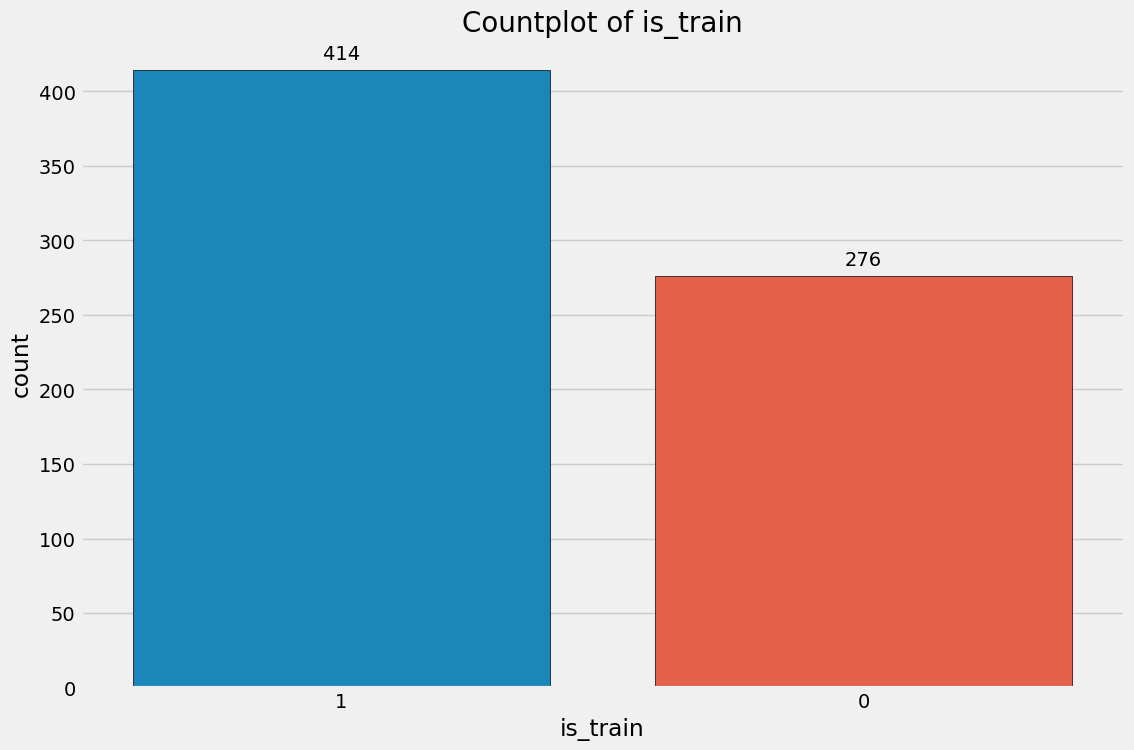

In [11]:
fast_eda(train_test, target = "is_train")

In [12]:
%%time
train_2D = TSNE().fit(train_tsne)

CPU times: user 14 s, sys: 197 ms, total: 14.2 s
Wall time: 14.9 s


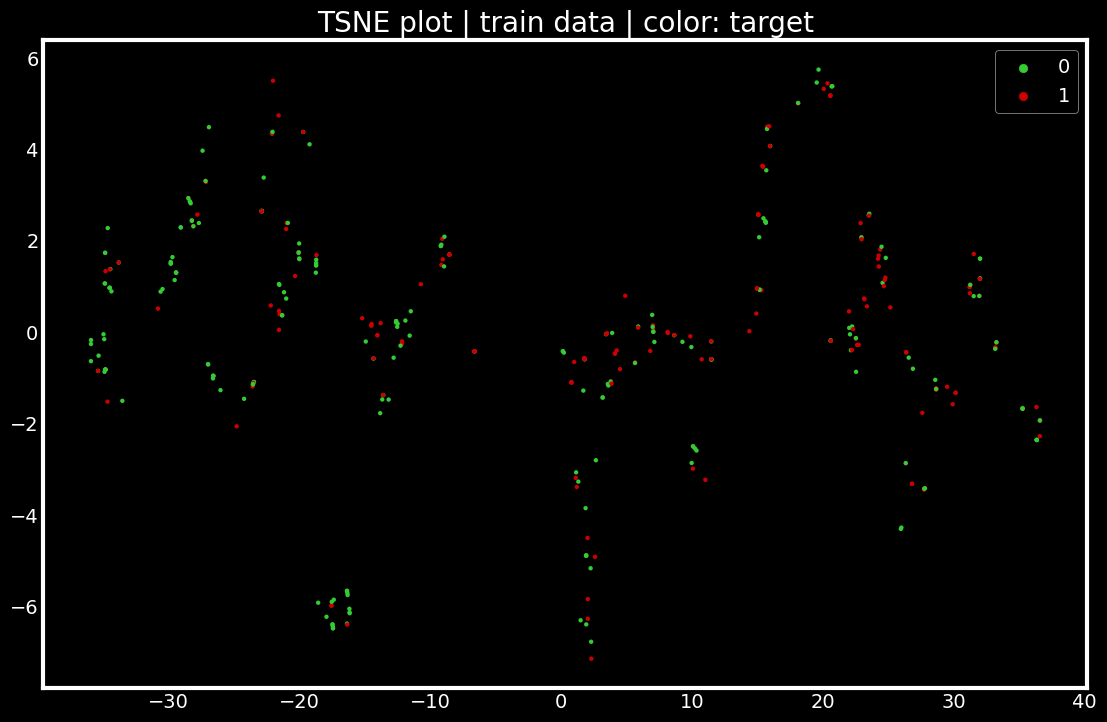

In [13]:
plt.style.use("dark_background")
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = train_2D[:,0], y = train_2D[:,1], s = 10, hue = y_tsne,
                linewidth = 0, palette = ["#33cc33", "#cc0000"])
plt.grid(False)
plt.title("TSNE plot | train data | color: target")
plt.show()

In [14]:
ss = StandardScaler()
X_train_ss = pd.DataFrame(ss.fit_transform(train_tsne))

In [15]:
pca = PCA(2)
X_train_ss2 = pca.fit_transform(X_train_ss)
pca2 = pd.DataFrame({"PCA1": X_train_ss2[:, 0], "PCA2": X_train_ss2[:, 1], "target": train["target"]})

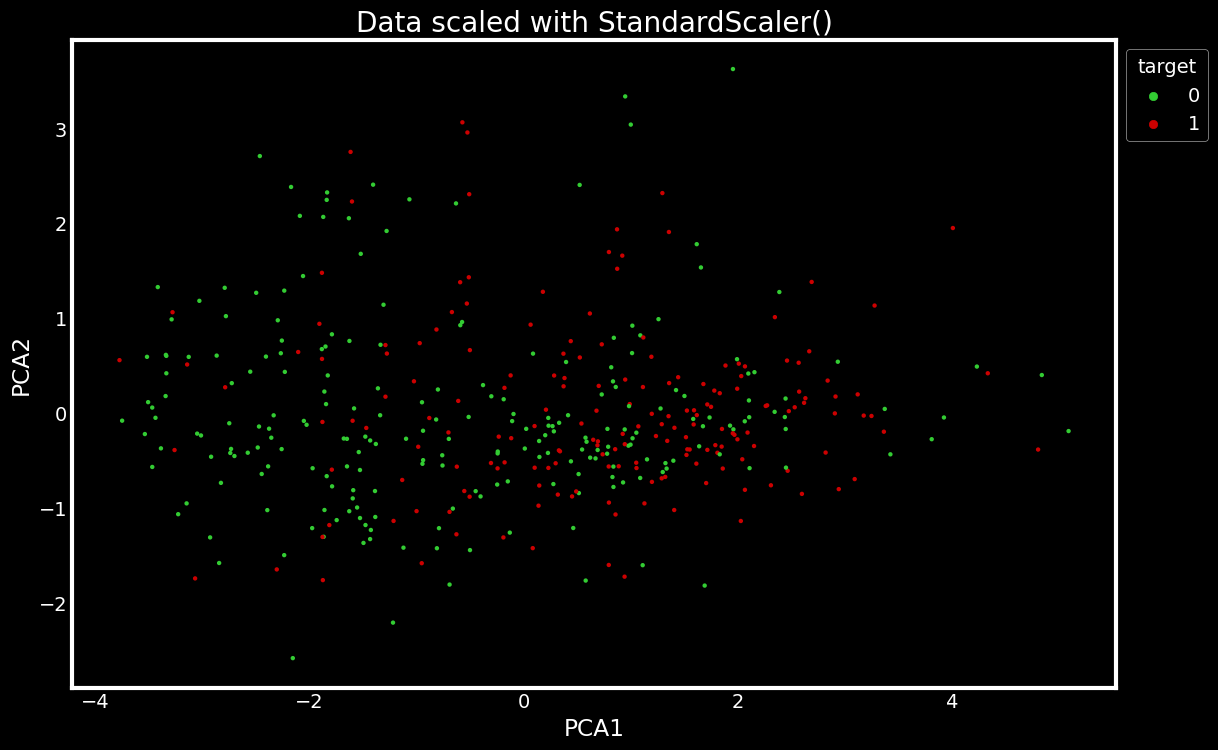

In [16]:
plt.style.use("dark_background")
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(data = pca2, x = "PCA1", y = "PCA2", s = 10, hue = "target",
                     linewidth = 0, palette = ["#33cc33", "#cc0000"])
plt.grid(False)
plt.title("Data scaled with StandardScaler()")
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.show()